<p  style="text-align: left;font-family: consolas; font-size: 12px; font-weight:bold;">
    author: Tsiapras Tilemachos 
</p>
<p  style="text-align: left;font-family: consolas; font-size: 12px; font-weight:bold;">
    date: 29/03/2022
</p>
<p  style="text-align: left;font-family: consolas; font-size: 12px; font-weight:bold;">
    revision: 1
</p>

<h1 style="font-family: arial, sans-serif; font-size:50px; color: #004225;text-align: center">  
[tt]
</h1>
<h1 style="font-family: arial, sans-serif; font-size: 20px; color: #000000;font-style: normal; font-weight: normal; font-variant: small-caps; text-align: left; letter-spacing: 0px; line-height: 20px;">
Step by Step
</h1>
<p style="font-family: arial, sans-serif; font-size: 16px; color: #000000; font-style: normal; font-weight: normal; font-variant: small-caps; text-align: left; letter-spacing: 0px; line-height: 20px;">
Learning about Hough transform
</p>

**Source:**
https://en.wikipedia.org/wiki/Hough_transform

<p  style="text-align: ledft;font-family: arial, sans-serif; font-size: 16px;">
In automated analysis of digital images, a subproblem often arises of detecting simple shapes, such as straight lines, circles or ellipses. In many cases an edge detector can be used as a pre-processing stage to obtain image points or image pixels that are on the desired curve in the image space. Due to imperfections in either the image data or the edge detector, however, there may be missing points or pixels on the desired curves as well as spatial deviations between the ideal line/circle/ellipse and the noisy edge points as they are obtained from the edge detector. For these reasons, it is often non-trivial to group the extracted edge features to an appropriate set of lines, circles or ellipses. The purpose of the Hough transform is to address this problem by making it possible to perform groupings of edge points into object candidates by performing an explicit voting procedure over a set of parameterized image objects (Shapiro and Stockman, 304).</p>

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/R_theta_line.GIF" alt="checkerboard with distortion" width="300"/>

<p  style="text-align: center;font-family: arial, sans-serif; font-size: 16px;">
The intuition for this form, similarly to the plane equation, is that every vector on the line must be perpendicular (orthogonal) to the straight line of length<span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle r}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>r</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle r}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0d1ecb613aa2984f0576f70f86650b7c2a132538" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.049ex; height:1.676ex;" alt="r"></span> that comes from the origin. It is easy to see that the intersection point of the function line and the perpendicular line that comes from the origin is at <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle P_{0}=(r\cos \theta ,r\sin \theta )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msub>
          <mi>P</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msub>
        <mo>=</mo>
        <mo stretchy="false">(</mo>
        <mi>r</mi>
        <mi>cos</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo>,</mo>
        <mi>r</mi>
        <mi>sin</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle P_{0}=(r\cos \theta ,r\sin \theta )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1a2085c03a99d17e42be6042956e57c58e291287" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:20.282ex; height:2.843ex;" alt="{\displaystyle P_{0}=(r\cos \theta ,r\sin \theta )}"></span>. So, for any point <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle P}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>P</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle P}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b4dc73bf40314945ff376bd363916a738548d40a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.745ex; height:2.176ex;" alt="P"></span> on the line, the vector <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle P-P_{0}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>P</mi>
        <mo>−<!-- − --></mo>
        <msub>
          <mi>P</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msub>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle P-P_{0}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7a7ab711724f8beac13df1229d6e0764a4a31c42" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:7.132ex; height:2.509ex;" alt="{\displaystyle P-P_{0}}"></span> must be orthogonal to the vector <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle P_{0}-0=P_{0}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msub>
          <mi>P</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msub>
        <mo>−<!-- − --></mo>
        <mn>0</mn>
        <mo>=</mo>
        <msub>
          <mi>P</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msub>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle P_{0}-0=P_{0}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c49c636b872aef07ed3a8b3a93f1baadc6cbbe5d" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:12.194ex; height:2.509ex;" alt="{\displaystyle P_{0}-0=P_{0}}"></span>. Therefore, we get that for any point <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle P=(x,y)}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>P</mi>
        <mo>=</mo>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo>,</mo>
        <mi>y</mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle P=(x,y)}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/099c643e67f1973c546d7e001eae4ab0ec7b2415" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:10.172ex; height:2.843ex;" alt="{\displaystyle P=(x,y)}"></span> on the function line, the equation <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle (P-P_{0})\cdot P_{0}=0}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mo stretchy="false">(</mo>
        <mi>P</mi>
        <mo>−<!-- − --></mo>
        <msub>
          <mi>P</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msub>
        <mo stretchy="false">)</mo>
        <mo>⋅<!-- ⋅ --></mo>
        <msub>
          <mi>P</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msub>
        <mo>=</mo>
        <mn>0</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (P-P_{0})\cdot P_{0}=0}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9ff6c8641f46e7da3ebb68781ad8a43ad487c958" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:17.428ex; height:2.843ex;" alt="{\displaystyle (P-P_{0})\cdot P_{0}=0}"></span> must be satisfied. Therefore, <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle P\cdot P_{0}=P_{0}\cdot P_{0}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>P</mi>
        <mo>⋅<!-- ⋅ --></mo>
        <msub>
          <mi>P</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msub>
        <mo>=</mo>
        <msub>
          <mi>P</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msub>
        <mo>⋅<!-- ⋅ --></mo>
        <msub>
          <mi>P</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msub>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle P\cdot P_{0}=P_{0}\cdot P_{0}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/49129225c89fcdafc84f2106f64966d948416389" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:15.842ex; height:2.509ex;" alt="{\displaystyle P\cdot P_{0}=P_{0}\cdot P_{0}}"></span>. Since <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle P=(x,y)}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>P</mi>
        <mo>=</mo>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo>,</mo>
        <mi>y</mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle P=(x,y)}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/099c643e67f1973c546d7e001eae4ab0ec7b2415" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:10.172ex; height:2.843ex;" alt="{\displaystyle P=(x,y)}"></span> and <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle P_{0}=(r\cos \theta ,r\sin \theta )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msub>
          <mi>P</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msub>
        <mo>=</mo>
        <mo stretchy="false">(</mo>
        <mi>r</mi>
        <mi>cos</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo>,</mo>
        <mi>r</mi>
        <mi>sin</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle P_{0}=(r\cos \theta ,r\sin \theta )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1a2085c03a99d17e42be6042956e57c58e291287" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:20.282ex; height:2.843ex;" alt="{\displaystyle P_{0}=(r\cos \theta ,r\sin \theta )}"></span>, we get <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle r(x\cos \theta +y\sin \theta )=r^{2}(\cos ^{2}\theta +\sin ^{2}\theta )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>r</mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mi>cos</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo>+</mo>
        <mi>y</mi>
        <mi>sin</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <msup>
          <mi>r</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
        <mo stretchy="false">(</mo>
        <msup>
          <mi>cos</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo>+</mo>
        <msup>
          <mi>sin</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle r(x\cos \theta +y\sin \theta )=r^{2}(\cos ^{2}\theta +\sin ^{2}\theta )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ad397228af0230b05f3035c42c912b609d0de20d" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:38.761ex; height:3.176ex;" alt="{\displaystyle r(x\cos \theta +y\sin \theta )=r^{2}(\cos ^{2}\theta +\sin ^{2}\theta )}"></span>. Since <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \cos ^{2}\theta +\sin ^{2}\theta =1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>cos</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo>+</mo>
        <msup>
          <mi>sin</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo>=</mo>
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \cos ^{2}\theta +\sin ^{2}\theta =1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9333418071b0b0662ba53f8983fe1cbb613ad005" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.505ex; width:18.132ex; height:2.843ex;" alt="{\displaystyle \cos ^{2}\theta +\sin ^{2}\theta =1}"></span>, we get the final form of <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle x\cos \theta +y\sin \theta =r}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>x</mi>
        <mi>cos</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo>+</mo>
        <mi>y</mi>
        <mi>sin</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>θ<!-- θ --></mi>
        <mo>=</mo>
        <mi>r</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle x\cos \theta +y\sin \theta =r}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/02fa06f4f34aeb2b5cbd7b6bd4218c699672e68d" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:19.169ex; height:2.509ex;" alt="{\displaystyle x\cos \theta +y\sin \theta =r}"></span>
</p> 

<h1 style="font-family: arial, sans-serif; font-size: 20px; color: #000000;font-style: normal; font-weight: normal; font-variant: small-caps; text-align: left; letter-spacing: 0px; line-height: 30px;">
Code</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'r')

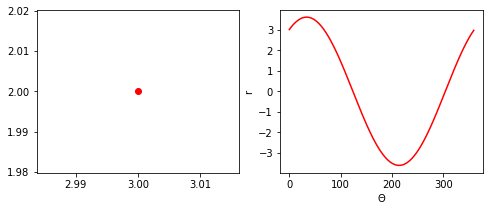

In [15]:
fig = plt.figure(figsize=(8,3))
#we have a point P
P = (3,2)
fig.add_subplot(1,2,1)
plt.scatter(P[0],P[1],c='r')

#lets take all possible lines that pass through that point
x,y = P
# Θ is bouded to 
solutions = np.zeros(360)
for th in range(360):
    solutions[th] = x*np.cos(np.radians(th)) + y*np.sin(np.radians(th))
    
fig.add_subplot(1,2,2)
plt.plot(solutions,c='r')
plt.xlabel("Θ")
plt.ylabel("r")

Text(0, 0.5, 'r')

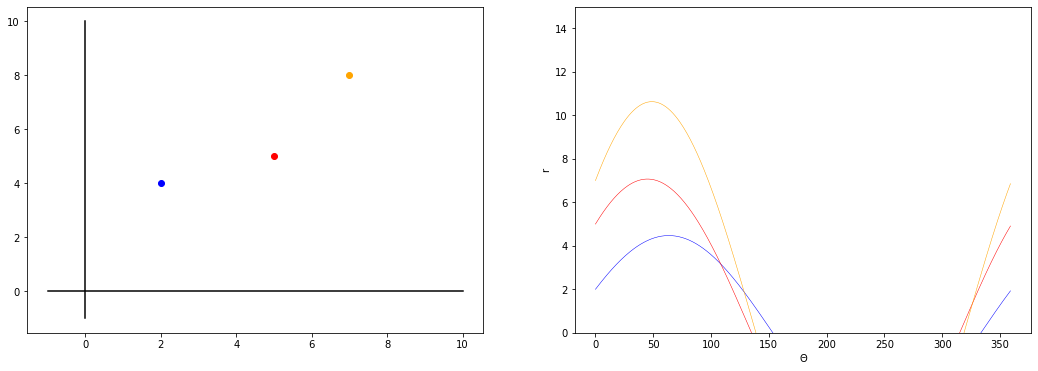

In [48]:
#adding a new point
fig = plt.figure(figsize=(18,6))
#we have a point P
P = [[2,4],[5,5],[7,8]]
c = ['b','r','orange']

fig.add_subplot(1,2,1)
plt.plot([0,0],[-1,10],c='k')
plt.plot([-1,10],[0,0],c='k')
for point,color in zip(P,c):
    plt.scatter(point[0],point[1],c=color)

    
fig.add_subplot(1,2,2)
for point,color in zip(P,c):

    #lets take all possible lines that pass through that point
    [x,y] = point
    # Θ is bouded to 
    solutions = np.zeros(360)
    for th in range(360):
        solutions[th] = x*np.cos(np.radians(th)) + y*np.sin(np.radians(th))

    plt.plot(solutions,c=color,lw=0.5)
plt.ylim([0,15])
plt.xlabel("Θ")
plt.ylabel("r")

<h1 style="font-family: arial, sans-serif; font-size: 20px; color: #000000;font-style: normal; font-weight: normal; font-variant: small-caps; text-align: left; letter-spacing: 0px; line-height: 20px;">
Lets Try an line</h1>

In [132]:
x = np.arange(20)
a = 0.9
b = 5
y = a*x+b + 3*np.random.rand(20)# line +white noise

P = np.stack([x,y],axis=1)


Text(0, 0.5, 'r')

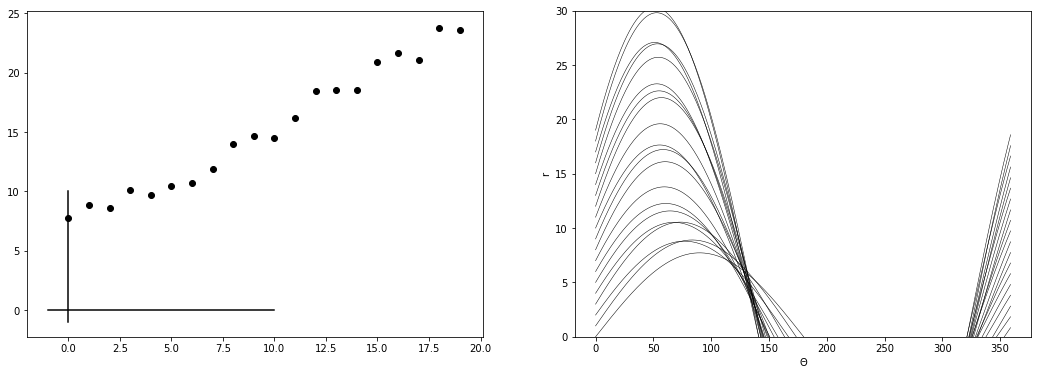

In [133]:
#adding a new point
fig = plt.figure(figsize=(18,6))
#we have a point P

fig.add_subplot(1,2,1)
plt.plot([0,0],[-1,10],c='k')
plt.plot([-1,10],[0,0],c='k')
for point in P:
    plt.scatter(point[0],point[1],c='k')

    
fig.add_subplot(1,2,2)

for point in P:

    #lets take all possible lines that pass through that point
    [x,y] = point
    # Θ is bouded to 
    solutions = np.zeros(360)
    for th in range(360):
        solutions[th] = x*np.cos(np.radians(th)) + y*np.sin(np.radians(th))
    plt.plot(solutions,c='k',lw=0.5)

plt.ylim([0,30])
plt.xlabel("Θ")
plt.ylabel("r")

<h1 style="font-family: arial, sans-serif; font-size: 20px; color: #000000;font-style: normal; font-weight: normal; font-variant: small-caps; text-align: left; letter-spacing: 0px; line-height: 20px;">
And now two</h1>

In [144]:
x = np.linspace(-5,10,40)
a = 0.9
b = 5
y = a*x+b + 2*np.random.rand(40)# line +white noise
P = np.stack([x,y],axis=1)

x = np.linspace(-5,10,40)
a = -0.6
b = 8
y = a*x+b + 2*np.random.rand(40)# line +white noise
P = np.vstack([P,np.stack([x,y],axis=1)])
P.shape

(80, 2)

Text(0, 0.5, 'r')

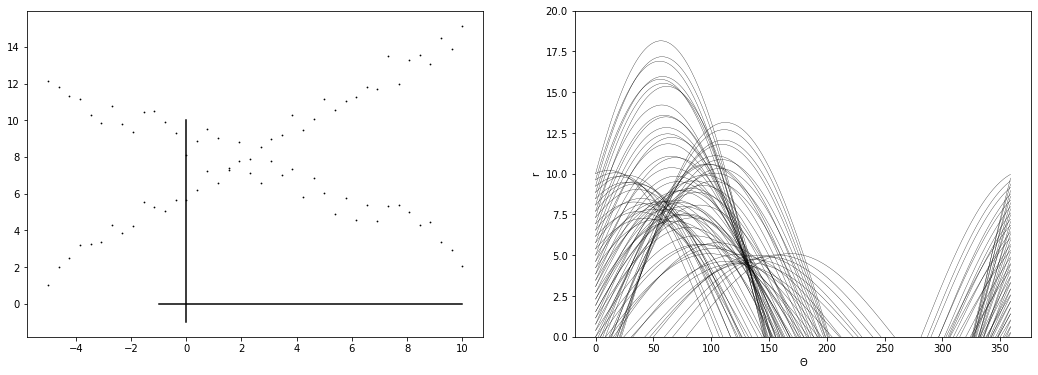

In [150]:
#adding a new point
fig = plt.figure(figsize=(18,6))
#we have a point P

fig.add_subplot(1,2,1)
plt.plot([0,0],[-1,10],c='k')
plt.plot([-1,10],[0,0],c='k')
for point in P:
    plt.scatter(point[0],point[1],c='k',s=0.6)

    
fig.add_subplot(1,2,2)

for point in P:

    #lets take all possible lines that pass through that point
    [x,y] = point
    # Θ is bouded to 
    solutions = np.zeros(360)
    for th in range(360):
        solutions[th] = x*np.cos(np.radians(th)) + y*np.sin(np.radians(th))
    plt.plot(solutions,c='k',lw=0.3)

plt.ylim([0,20])
plt.xlabel("Θ")
plt.ylabel("r")

<h1 style="font-family: arial, sans-serif; font-size: 20px; color: #000000;font-style: normal; font-weight: normal; font-variant: small-caps; text-align: left; letter-spacing: 0px; line-height: 20px;">
Now an image</h1>

(158, 158)


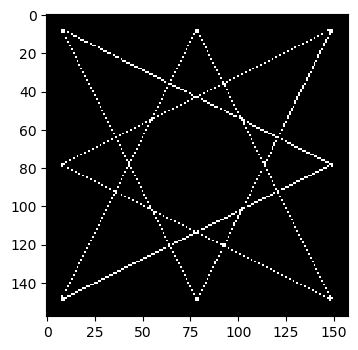

In [166]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

img = plt.imread(r"C:\Users\ttsiapras\Pictures\geom.bmp",0)
img = img[:,:,0]
print(img.shape)
img = np.where(img<100,1,0)
plt.imshow(img,cmap='gray')

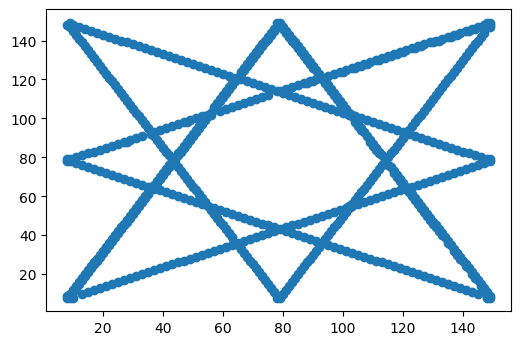

In [184]:
def translate(i,j,h): 
    return([h-1-i,j])

h,w = img.shape
points = []
for i in range(h):
    for j in range(w):
        if(img[i,j]==1):
            points.append(translate(i,j,158))
            
P = np.array(points)
plt.scatter(P[:,0],P[:,1])

Text(0, 0.5, 'r')

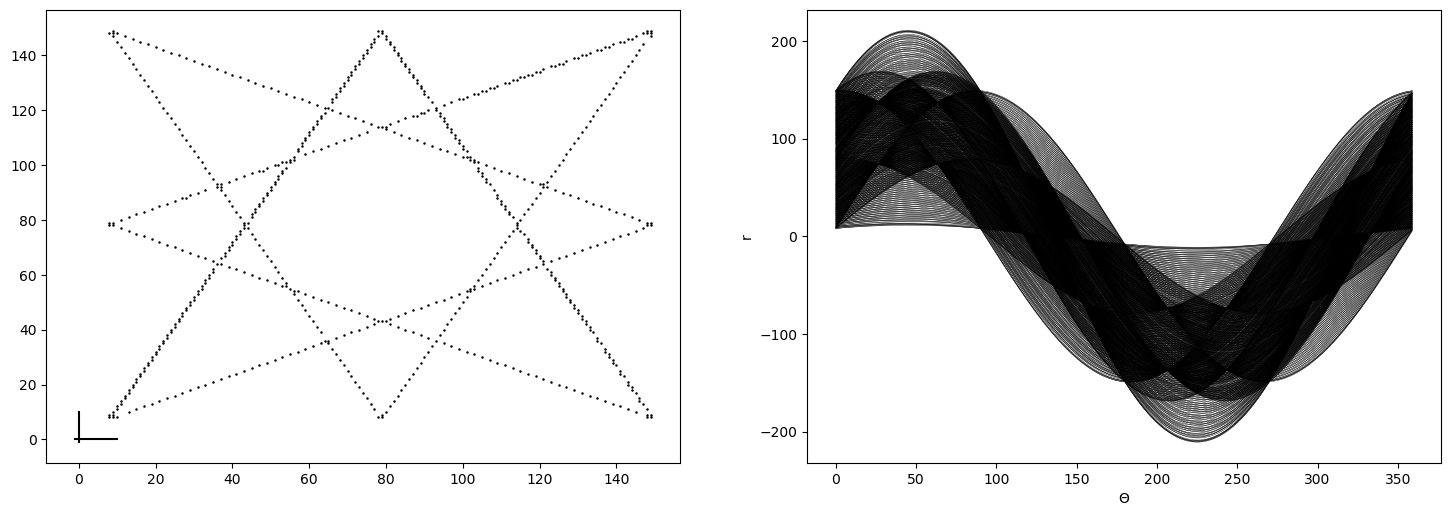

In [186]:
#adding a new point
fig = plt.figure(figsize=(18,6))
#we have a point P

fig.add_subplot(1,2,1)
plt.plot([0,0],[-1,10],c='k')
plt.plot([-1,10],[0,0],c='k')
for point in P:
    plt.scatter(point[0],point[1],c='k',s=0.6)

    
fig.add_subplot(1,2,2)

for point in P:

    #lets take all possible lines that pass through that point
    [x,y] = point
    # Θ is bouded to 
    solutions = np.zeros(360)
    for th in range(360):
        solutions[th] = x*np.cos(np.radians(th)) + y*np.sin(np.radians(th))
    plt.plot(solutions,c='k',lw=0.3)

#plt.ylim([0,20])
plt.xlabel("Θ")
plt.ylabel("r")

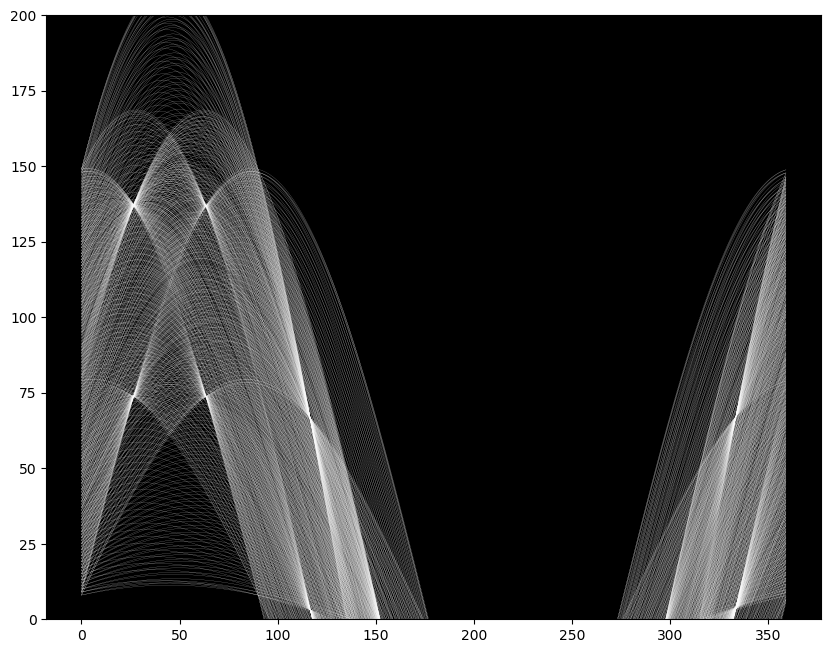

In [199]:
mpl.rcParams['figure.dpi'] = 100

fig = plt.figure(figsize=(10,8))
ax = plt.axes()
ax.set_facecolor((0, 0, 0))
for point in P:

    #lets take all possible lines that pass through that point
    [x,y] = point
    # Θ is bouded to 
    solutions = np.zeros(360)
    for th in range(360):
        solutions[th] = x*np.cos(np.radians(th)) + y*np.sin(np.radians(th))
    plt.plot(solutions,c='w',lw=0.1)
    
plt.ylim([0,200])
plt.show()
fig.savefig("temp.jpg")